# Example of findhome function

In [2]:
import sys
sys.path.append("../") 
import communicationwmongo as commu
import home_location as home
# open mongo connection
db=commu.connecttoLocaldb(database='Twitter_Data')

In [3]:
import importlib
importlib.reload(home)

<module 'home_location' from '..\\home_location.py'>

In [4]:
# cursor for users id
cursor=db.users.find()

In [5]:
uid=cursor.next()['u_id']

In [6]:
uid

718

Find home function with map option to True

In [7]:
result=home.findhome(db,uid, map=True)
print(result.completed)

False


tweetsfromhome method

In [20]:
result.tweetsfromhome()[['created_at','text']].head()

,created_at,text
9,1347121107000,#JonasArgentina Ready For Jonas Single
10,1347121245000,#JonasArgentina tiene que ser TT mundial x fav...
13,1347119869000,Ready For Jonas Single :“)
14,1347121174000,#JonasArgentina Ready For Jonas Single LOS NEC...
16,1347124037000,@_silvita_ te podes ir bien a la mierda me chu...


In [7]:
result.tweetsfromwork()[['created_at','text']].head()

,created_at,text
7,1346870042000,Tengo de fondo de pantalla un cafe de Starbuck...
8,1346869237000,Alto quilombo se armo con las notas de quimica...
11,1346869572000,@RadioTKM #MiSuperHeroeFavoritoEs Chizy Araña...
12,1346875066000,Alguien tiene WhatsApp??? Es q yo tengo y nadi...
21,1349806307000,Que onda con mi celu.. Pongo musica y suena pu...


These are the most frequent locations and variables used as part of the home location algorithm

In [11]:
result.freqdfi

,lat,lon,freq,uniquehours,hourrange,night_freq,weekend_freq,geometry,distance,freqp1,pnight_freq,pweekend_freq,interactnightyweekend,pday_freq,pweekday_freq,interactdayyweekday
0,-34.61,-58.84,154,15,23,63.0,81.0,POINT (-58.84 -34.61),0.00000,1.000000,0.409091,0.525974,0.215171,0.590909,0.474026,0.280106
1,-34.65,-58.80,152,8,7,0.0,0.0,POINT (-58.8 -34.65),627.50466,0.987013,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
2,-34.62,-58.84,64,13,23,35.0,12.0,POINT (-58.84 -34.62),110.92820,0.415584,0.546875,0.187500,0.102539,0.453125,0.812500,0.368164


This is an auxiliary function that plots tweets according to hour of the day 

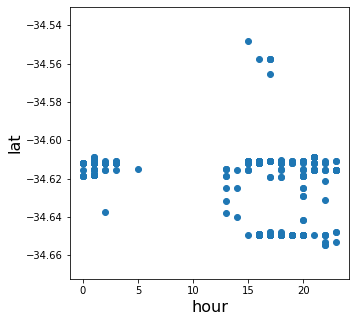

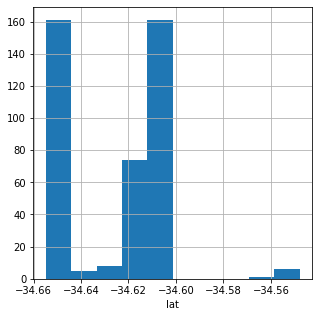

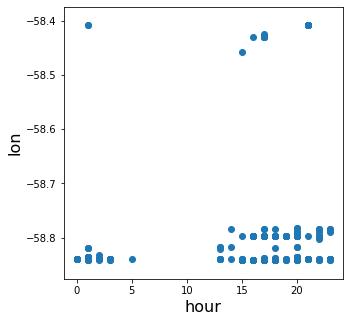

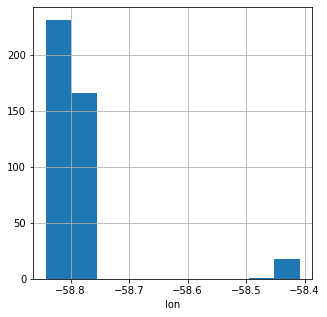

In [21]:
home.timeofdayplot(db,uid)

# Find Home with method Hex

This version of the function finds the home polygon. 
Currently does not support mapping


In [25]:
result=home.findhome(db,uid, method='hex9', map=False)

../home_location.py:135: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  rangedfi = pd.concat([dfi.groupby(spatialgroup)['hour'].agg({'hourrange': lambda x: x.max() - x.min()})],
/home/rickhunter/miniconda3/envs/twitteranalysis/lib/python3.6/site-packages/pyproj/crs.py:77: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method.
  return _prepare_from_string(" ".join(pjargs))


In [29]:
result.freqdfi

,hex9,freq,uniquehours,hourrange,night_freq,weekend_freq,freqp1,pnight_freq,pweekend_freq,interactnightyweekend,pday_freq,pweekday_freq,interactdayyweekday
0,89dd6876007ffff,145,13,23,60.0,76.0,1.000000,0.413793,0.524138,0.216885,0.586207,0.475862,0.278954
1,89dd6876e27ffff,91,7,6,0.0,0.0,0.627586,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
2,89dd68768cbffff,61,7,7,0.0,0.0,0.420690,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
3,89dd6876033ffff,53,14,23,24.0,17.0,0.365517,0.452830,0.320755,0.145247,0.547170,0.679245,0.371663
4,89dd6876023ffff,19,2,19,13.0,0.0,0.131034,0.684211,0.000000,0.000000,0.315789,1.000000,0.315789


In [30]:
result.homecoordinates

hex9                     89dd6876007ffff
freq                                 145
uniquehours                           13
hourrange                             23
night_freq                            60
weekend_freq                          76
freqp1                                 1
pnight_freq                     0.413793
pweekend_freq                   0.524138
interactnightyweekend           0.216885
Name: 0, dtype: object

In [31]:
result.homecoordinates['hex9']

'89dd6876007ffff'